# Fairness and Privacy Assessment in Higher Education Student Performance Prediction

Dataset: https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation

## 1. Research question and reproducibility
What is the research question? \
What data do you need to answer it? \
How will you analyse the data in order to get an answer? \
Construct a pipeline for data analysis in your specific problem that you can easily re-use. \
Try to ensure your results are reproducible.



The primary objective of this research is to optimize the admission criteria for master's programs by considering both current and expected future academic performance. This research aims to introduce a more rational and fair admission policy by incorporating factors such as existing GPA, grades in individual courses, and expected future GPA. The central research question is whether the school should offer a master's program admission to a student (a) based on their current grades (x) and expected future GPA (y). This involves the optimization of admission criteria to ensure a fair and effective selection process.

Data Collection:
We are using the “Higher Education Student Performance Prediction” dataset, which is publicly available from the UCI Machine Learning Repository. The dataset contains features such as student age, gender, high school type, scholarship type, work, artistic or sports activities, partner status, total salary, transportation, accommodation, Mother education, Father education, number of siblings, kids, mother’s job, father’s job, reading frequency, class attendance, impact, attend, preparation study, preparation for the exam, notes, listens, discussion advocacy, classroom, cumulative GPA, EXP GPA, course ID, and Grade.
This dataset has been compiled and made accessible for research and analysis purposes. It contains information related to higher education students and various attributes that are relevant to their academic performance, as well as other personal factors. These features provide valuable insights into the students' demographic, socio-economic, and lifestyle characteristics.



In [ ]:
########################### For Chenrui ###########################
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Privacy/')

!wget https://archive.ics.uci.edu/static/public/856/higher+education+students+performance+evaluation.zip -O higher-education-students-performance-evaluation.zip
!unzip -f higher-education-students-performance-evaluation.zip

import pandas as pd
file_path = 'DATA.csv'
df = pd.read_csv(file_path)
###############################################################

In [ ]:
!wget https://archive.ics.uci.edu/static/public/856/higher+education+students+performance+evaluation.zip -O higher-education-students-performance-evaluation.zip
!unzip -f higher-education-students-performance-evaluation.zip

In [ ]:
import pandas as pd
file_path = '/content/DATA (1).csv'
df = pd.read_csv(file_path)

In [11]:
df.head(5)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [13]:
# The following image shows the descriptive statistics for our dataset
df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
1,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
2,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
3,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
4,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
5,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
6,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
7,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
8,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
9,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
10,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


<Figure size 10000x9000 with 0 Axes>

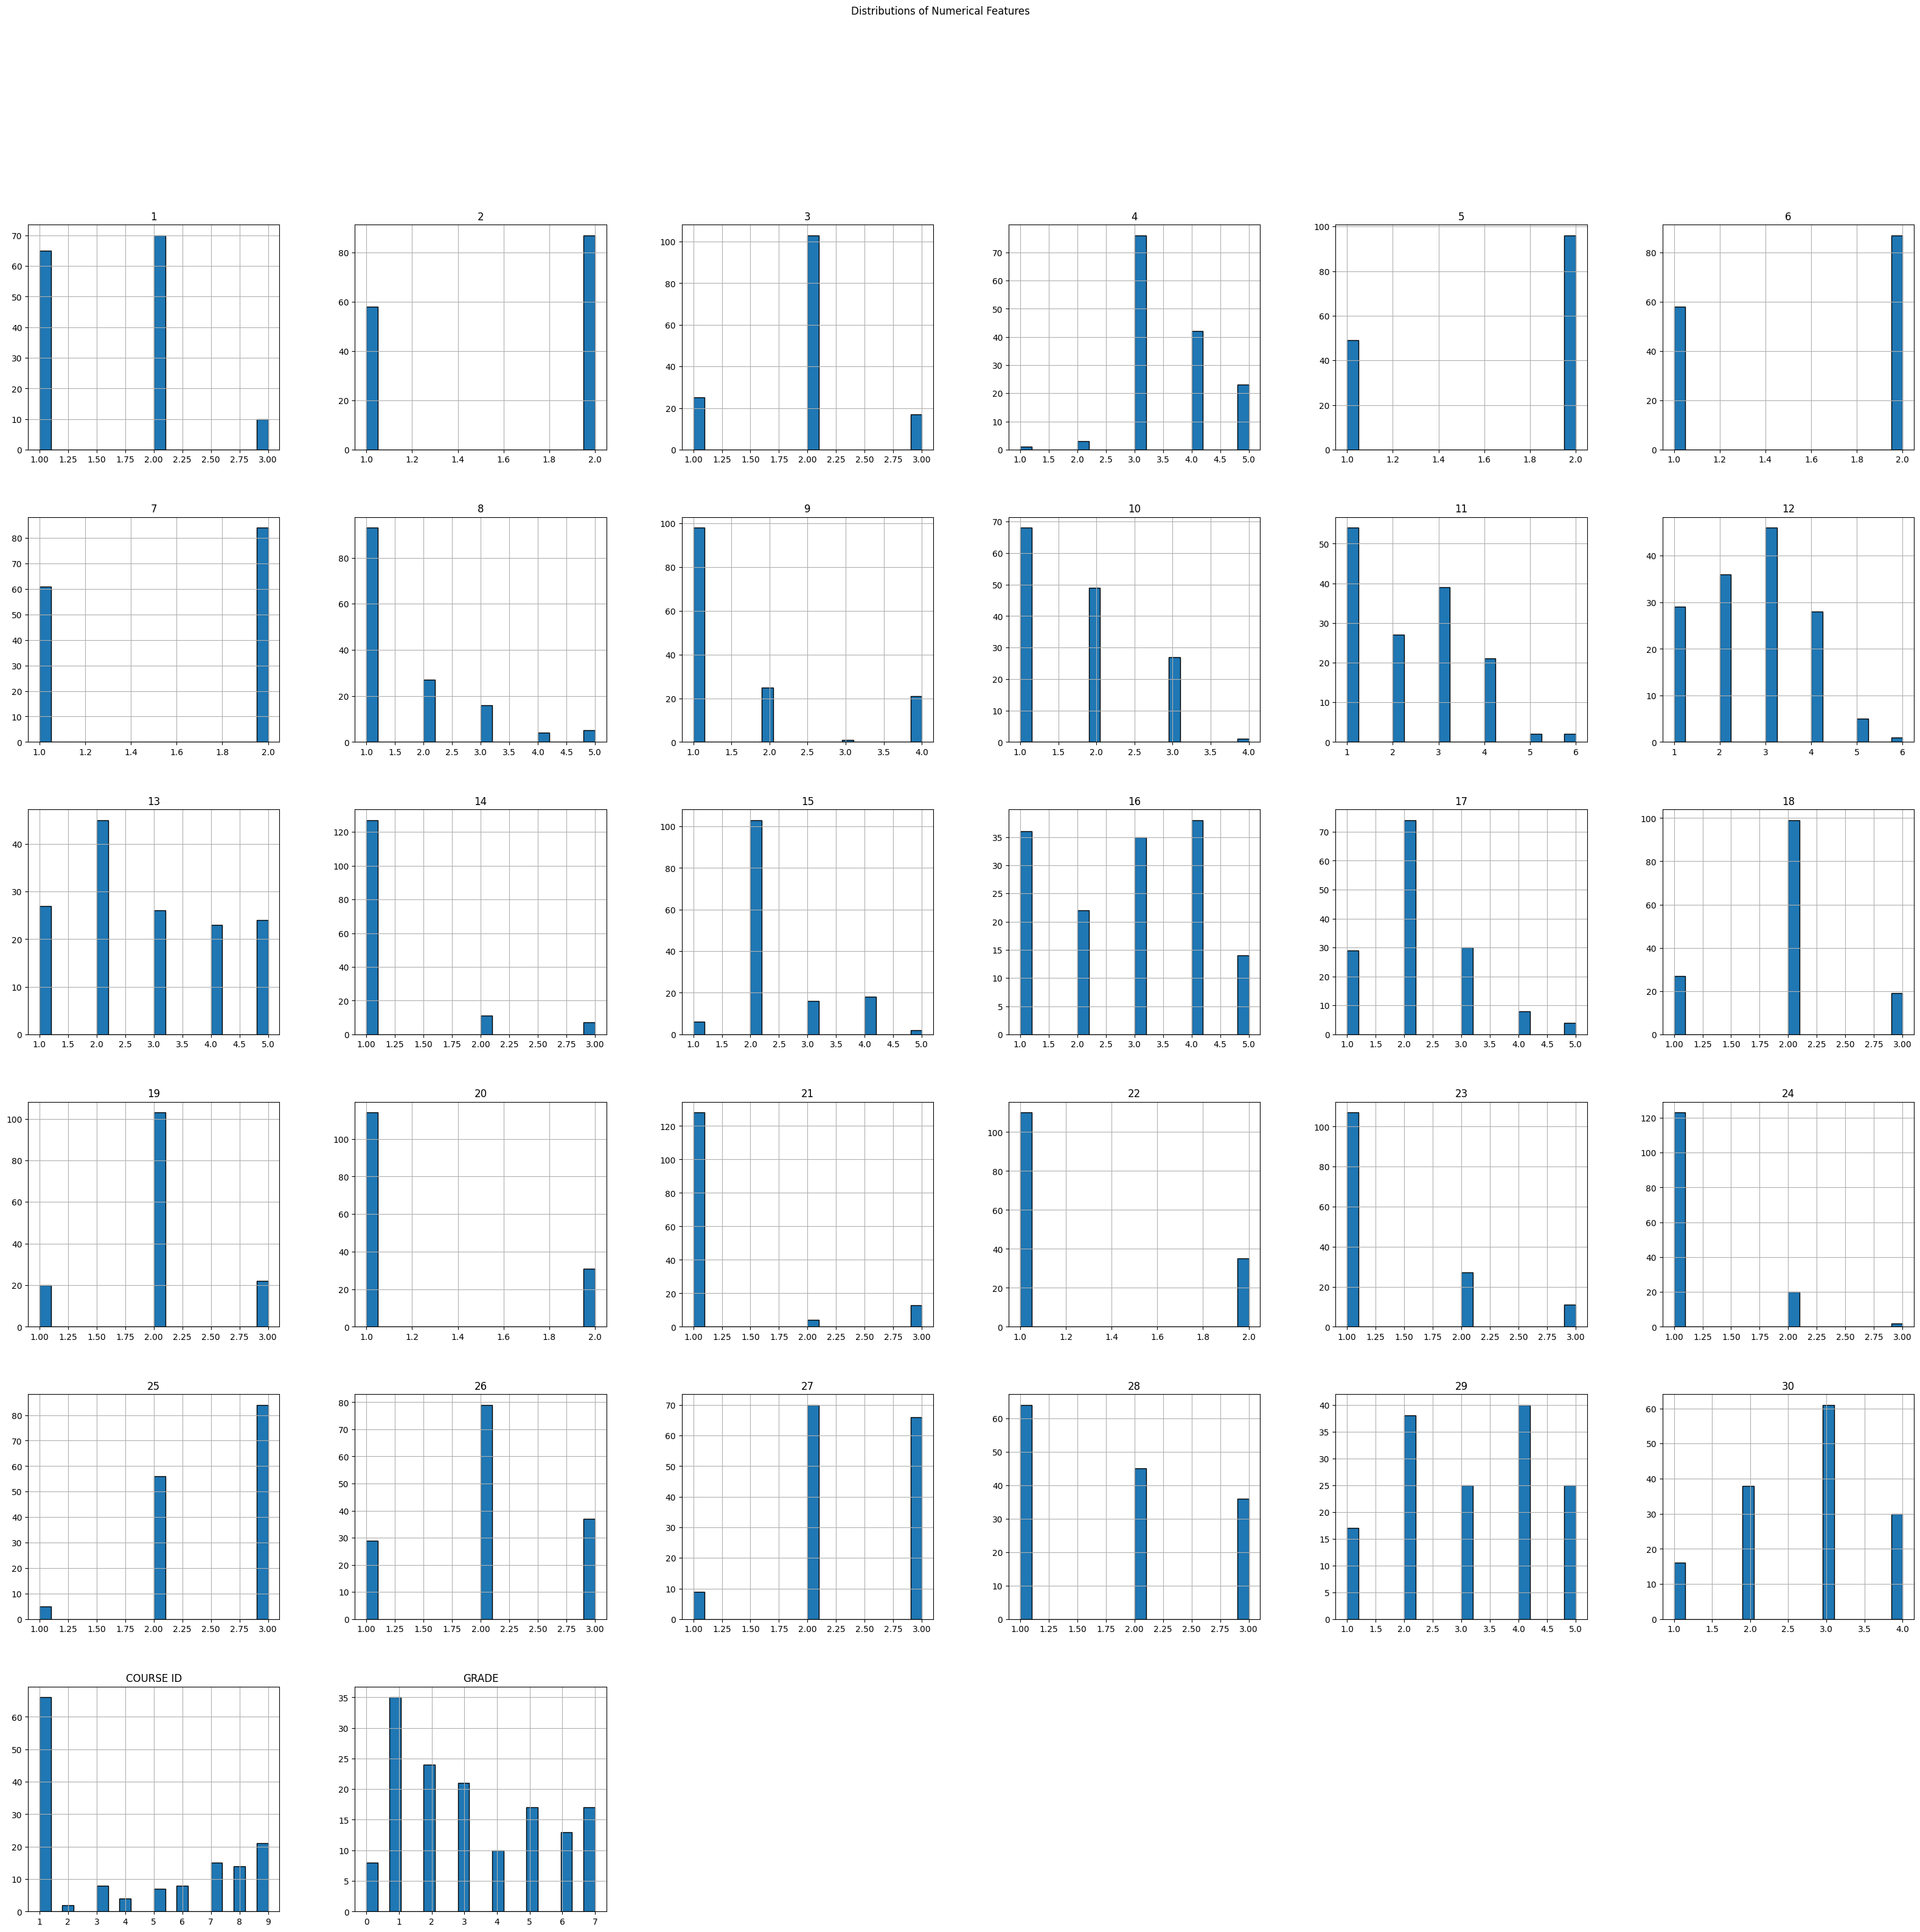

In [14]:
# To visualize distributions of numerical features
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(100, 90))
df[numerical_columns].hist(bins=20, figsize=(40, 36), edgecolor='black')
plt.suptitle('Distributions of Numerical Features')
plt.show()

This function calculates a total score based on the weighted combination of current GPA and average course grades. It then compares this score to the major-specific GPA threshold to determine the admission decision variable a

In [79]:
import numpy as np

# In this example function, we used optimized_weights to represent the weights we will obtain
# through the optimization process. The purpose is to emphasize that the decision-making process considers
# a weighted combination of the current GPA and the average of course grades.

def compute_admission_decision(current_gpa, course_grades, weights, num_of_offer):
    # compue weighted combination of current GPA and course grades
    total_score = weights[0] * current_gpa + weights[1] * np.average(course_grades)

    top_guys = total_score.argsort()[::-1][:num_of_offer]

    a = np.zeros_like(total_score)
    a[top_guys] = 1

    return a

For pipeline, we would like to use the same function each time we process a new dataset into individual variables: x-data features, y-future outcomes, z-features that bring bias to the decision, a-past decisions.\
In this dataset: \
y corresponds to column 30 "Expected Cumulative grade point average in the graduation"; \
z corresponds to column 2 "Sex" and column 31 "Course ID"; \
a is our decision based on "Cumulative grade point average in the last semester" in column 29 and "Cumulative grade point average in the last semester" in column 32 "OUTPUT Grade", where 1 means "Accepted" and 0 means "Rejected"; \
x is all the other characteristics left in the data after separating z and y.

In [80]:
def pipeline(df, current_GPA_index, current_Grades_index, expected_GPA_index, bias_feature_index):
  x_origin = df.copy()

  # Extract 'y' - the expected cumulative GPA upon graduation
  y = x_origin.iloc[:, expected_GPA_index - 1].astype(float)

  z = x_origin.iloc[:, bias_feature_index]  # Selecting the 2nd and 31st columns

  # Extract 'x' - all other characteristics
  bias_feature_index.append(expected_GPA_index - 1)
  x = x_origin.drop(x_origin.columns[bias_feature_index], axis=1)

  # Now, get the original a
  weights = np.array([0.8, 0.2])
  num_of_offer = 80
  current_gpa = x_origin.iloc[:, current_GPA_index - 1]
  course_grades = x_origin.iloc[:, current_Grades_index - 1]
  a_origin = compute_admission_decision(current_gpa, course_grades, weights, num_of_offer)

  return x_origin, x, y, z, a_origin

In [81]:
# You can define the variables as you like
current_GPA_index = 29
current_Grades_index = 32
expected_GPA_index = 30
# choose bias feature
gender = 2
course_id = 31
bias_feature_index = [gender - 1, course_id - 1]

In [82]:
# Now you can use this pipeline to deal with all datasets.
x_origin, x, y, z, a_origin = pipeline(df, current_GPA_index, current_Grades_index, expected_GPA_index, bias_feature_index)

For reproducible, refer to the textbook starting on page 61 to refine the code.\
Typical methods such as recording the random seed while doing RP, or fixing the random seed at the beginning.

In [16]:
# To be continue

## 2. Privacy: Identify potential privacy issues in the data.
This includes protecting individuals in the data set (if talking about a static analysis), or users during system deployment (if talking about a deployed system). \
Choose one or two suitable methods that formally protect privacy (any variant of DP is good, but k-anonymity provides no formal guarantees) and see how maintaining privacy affects performance of your analysis.

Based on the attributes provided in the dataset, there are several potential privacy issues to consider:

1. **Student ID:** This is a unique identifier and should be handled carefully to avoid re-identification risks. Any analysis or publication should be performed without exposing individual student IDs.

2. **Age and Gender:** While age and gender are often collected for statistical purposes, they can still be considered sensitive information. Aggregating age ranges rather than providing specific ages can help mitigate this.

3. **Financial Information:** Attributes such as total salary, scholarship type, and parental status may reveal financial details about the students or their families, introducing privacy concerns.

4. **Family Information:** The number of siblings, parents' education, parents' occupation, and parental status can collectively provide a detailed profile of the students' family, potentially compromising privacy.

5. **Residential and Transportation Information:** Accommodation type and transportation method can indirectly reveal a student's location, which may be sensitive information.

6. **Educational History:** Details about parents' education and students' past educational experiences can be sensitive and contribute to re-identification risks.

7. **Study Habits and Performance:** Weekly study hours, reading frequency, attendance to classes, and performance-related attributes can collectively provide insights into a student's study habits and academic performance, potentially impacting privacy.

8. **Personal Habits:** Attributes related to personal habits, such as attendance to seminars, impact of projects on success, and preparation for exams, may reveal information about students' preferences and behaviors.

However, when preparing a dataset for predicting whether a student will receive a master's degree offer or not, it's essential to identify and select the relevant attributes to improve the efficiency of the predictive model and reduce noise in the data.

In [17]:
df_privacy = df.copy()
df_privacy = df_privacy[['STUDENT ID', '1', '2', '5', '29', '30', 'COURSE ID', 'GRADE']]
df_privacy.head()

,STUDENT ID,1,2,5,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,1,1,1,1,1
1,STUDENT2,2,2,1,2,3,1,1
2,STUDENT3,2,2,2,2,2,1,1
3,STUDENT4,1,1,1,3,2,1,1
4,STUDENT5,2,2,2,2,2,1,1


## 3. Fairness: Identify potential fairness issues.
Measure one or more types of fairness inherent in the data itself or your model/algorithm (e.g. a classifier, if that is your project's task). \
Finally, implement a mechanism to mitigate one type of fairness, time-permitting.

Here, let's assume a problem: based on the student's current grades (current GPA as well as grades in each course) - x, and expected future GPA - y, determine whether the school should or should not give the student a master offer --a. \
If the offer is given according to individual academic performance which is the student's existing GPA as well as the grades in each course, then we stipulate: only those with an existing GPA of 4 or above will be considered; at the same time, there is a limit on the number of admission quota: only m students can be admitted, then we further stipulate: when the GPAs are the same, the higher the grades in the courses the higher the student will be admitted. This gives us the initial decision result - a_original. \
$\pi_0(a_t | x_t, z_t)$\
This decision result is clearly irrational - because the GPAs of people in different majors are given by instructors in different courses, and the distribution of grades given by individual instructors is disparate, with some instructors giving relatively high grades and others lower; also, comparing course grades when the GPAs are the same is irrational, because different courses are not of the same difficulty and cannot be measured by a single evaluation criterion. So next we want to optimize this policy. \

### Group Fairness
For Group Fairness, here are a few bias features that need to be balanced: the first is gender - for example, the textbook mentions that some high school teachers discourage girls from studying math; the second is majors - some majors' course grades have means and medians that are are significantly greater than course grades in other majors, which can lead to relatively higher GPAs in those majors. These can be categorized into different groups-z, which we expect to satisfy the following formula also known as Equality of Opportunity:\
$P^{\pi}_{\theta}(a_t | z_t) = P^{\pi}_{\theta}(a_t)$. \
Meanwhile, for Demographic Parity, we want it to satisfy the following equation: \
$P^{\pi}_{\theta}(y_t | z_t) = P^{\pi}_{\theta}(y_t)$. \
For Calibration, we want it to satisfy the following equation: \
$P^{\pi}_{\theta}(y_t | a_t, z_t) = P^{\pi}_{\theta}(y_t | a_t)$. \
For Balance, we want it to satisfy the following equation:\
$P^{\pi}_{\theta}(a_t | y_t, z_t) = P^{\pi}_{\theta}(a_t | y_t)$. \
For the Utility function, since the larger the value of y, the higher the GPA the admitted student is expected to achieve, we consider the following function: \
$U(a, y) = (a-\frac{y}{y_{max}})^2$\
This function shows that as the expected GPA of the admitted student gets higher, the function takes on a smaller value, in which case we want U to be as small as possible. \
For the Fairness function, since we know that strict independent uncorrelation is hard to exist in practice, we use the following function: \
$F(a, y) = (P^{\pi}_{\theta}(a_t | y_t, z_t) - P^{\pi}_{\theta}(a_t | y_t))^2$\
In this case we want F to be as small as possible. Note that $P^{\pi}_{\theta}(a_t | y_t, z_t)$ here is just an example, in fact we will compute the four independent irrelevant conditions mentioned above. \
We can then use Unconstrained optimisation and the set $\lambda$ to construct the objective function as well as optimize it: \
$\min_{\pi} (1 - \lambda)U(\pi, \theta) + \lambda F(\pi, \theta)$\
where, for x, y, z, a, we make no changes, and the only goals we optimize are the trainable weights $w$ and $b$ in the new policy function:\
$\pi(a | x, z) = wx + bz$\
After obtaining the new POLICY function in this way, we can make more FAIRNESS predictions for all students in the next enrollment.

In [101]:
import numpy as np
from scipy.optimize import minimize

# First, define the new policy function, π(a∣x, z)= wx + bz where w and b are trainable weights.
def policy_function(x, z, w, b):

    print(w.shape, x.shape, b.shape, z.shape)
    policy = np.dot(x, w) + np.dot(z, b)
    print(policy.shape)
    return np.around(policy)

# Then define the utility function
def utility_function(a, y):
    # we should first find y_max in y column
    y_max = float(max(y))
    # notice! if a=0, means we reject this student, so y should equal to 0 as well.
    if a==0:
      utility = 0.0;
    else:
      utility = (a - y / y_max) ** 2
    return utility

About fairness function, I want to use Unconstrained optimisation so I fused four constraint terms that need to be balanced into Fairness fuction:

In [84]:
# Next, define fairness function

# probabilities is a dictionary that holds the individual probabilities.
def fairness_function(a, y, z, probabilities, theta):
    # Equality of Opportunity
    equality_opportunity = (probabilities[a, z] - probabilities[a]) ** 2

    # Demographic Parity
    demographic_parity = (probabilities[y, z] - probabilities[y]) ** 2

    # Calibration
    calibration = (probabilities[y, a, z] - probabilities[y, a]) ** 2

    # Balance
    balance = (probabilities[a, y, z] - probabilities[a, y]) ** 2

    # Sum of squared differences
    fairness = equality_opportunity + demographic_parity + calibration + balance

    # We can also use some weights to balance the fairness
    fairness_balanced = theta[0]*equality_opportunity + theta[1]*demographic_parity + theta[2]*calibration + theta[3]*balance

    # I'll experiment later with whether I want to set these hyperparameters theta to be trainable.

    return fairness

In [85]:
# define probabilities function to get probabilities dictionary
def calculate_probabilities(x, y, z, a):
    probabilities = {}

    probabilities['a'] = np.mean(a)
    probabilities['y'] = y.mean()

    # probabilities[a, z]
    probabilities['a, z'] = x.groupby(z)['a'].mean()

    # probabilities[y, z]
    probabilities['y, z'] = x.groupby(z)['y'].mean()

    # probabilities[y, a, z]
    probabilities['y, a, z'] = x.groupby([a, z])['y'].mean()

    # probabilities[y, a]
    probabilities['y, a'] = x.groupby(a)['y'].mean()

    # probabilities[a, y, z]
    probabilities['a, y, z'] = x.groupby([y, z])['a'].mean()

    # probabilities[a, y]
    probabilities['a, y'] = x.groupby(y)['a'].mean()

    return probabilities

In [91]:
# Objective function
def objective_function(params, x, z, y, lambda_val, theta):

    w, b = params[:x.shape[1]], params[x.shape[1]:]
    a = policy_function(x, z, w, b)

    # we now can culculate probabilities dictionary using this a
    probabilities = calculate_probabilities(x, y, z, a)

    U = utility_function(a, y)
    F = fairness_function(a, y, z, probabilities, theta)

    return (1 - lambda_val) * U + lambda_val * F

In [92]:
# Optimization
def optimize_policy(x, z, y, lambda_val, theta):
    print(len(x), len(z))
    print(len(x[0]), len(z[0]))
    initial_params = np.random.rand(x.shape[1] + z.shape[1])  # Random initial weights
    # if we want to train lamda and theta, we can add it to initial_params, here we just fix their values.
    result = minimize(objective_function, initial_params, args=(x, z, y, lambda_val, theta))
    return result.x  # Optimized weights

In [ ]:
lambda_val = 0.5
theta = [0.25, 0.25, 0.25, 0.25]

x_array = x.drop(x.columns[0], axis=1)
x_array = np.array(x_array, dtype=float)
print(x_array.shape[1])
z_array = np.array(z, dtype=float)
y_array = np.array(y, dtype=float)
# result = optimize_policy(x_array, z_array, y_array, lambda_val, theta)

### Individual Fairness
For Individual Fairness, we mentioned before that "when GPAs are the same, students with higher course grades will be admitted" is not reasonable.
So we want to consider all aspects of a student to make the decision smoother.

In [103]:
# To be continue